In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 62s 103ms/step - accuracy: 0.5180 - loss: 2.5364 - val_accuracy: 0.6475 - val_loss: 0.6485
Epoch 2/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 59s 101ms/step - accuracy: 0.5784 - loss: 0.6617 - val_accuracy: 0.6232 - val_loss: 0.6488
Epoch 3/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 60s 102ms/step - accuracy: 0.6405 - loss: 0.6222 - val_accuracy: 0.7262 - val_loss: 0.5511
Epoch 4/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 60s 103ms/step - accuracy: 0.7001 - loss: 0.5689 - val_accuracy: 0.7509 - val_loss: 0.5168
Epoch 5/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 60s 103ms/step - accuracy: 0.7169 - loss: 0.5301 - val_accuracy: 0.7598 - val_loss: 0.4878
Epoch 6/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 82s 103ms/step - accuracy: 0.7487 - loss: 0.4934 - val_accuracy: 0.7707 - val_loss: 0.4897
Epoch 7/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 60s 102ms/step - accuracy: 0.7649 - loss: 0.4574 - val_accuracy: 0.7880 - val_loss: 0.4586
Epoch 8/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 60s 103ms/step - accuracy: 0.7993 - loss: 0

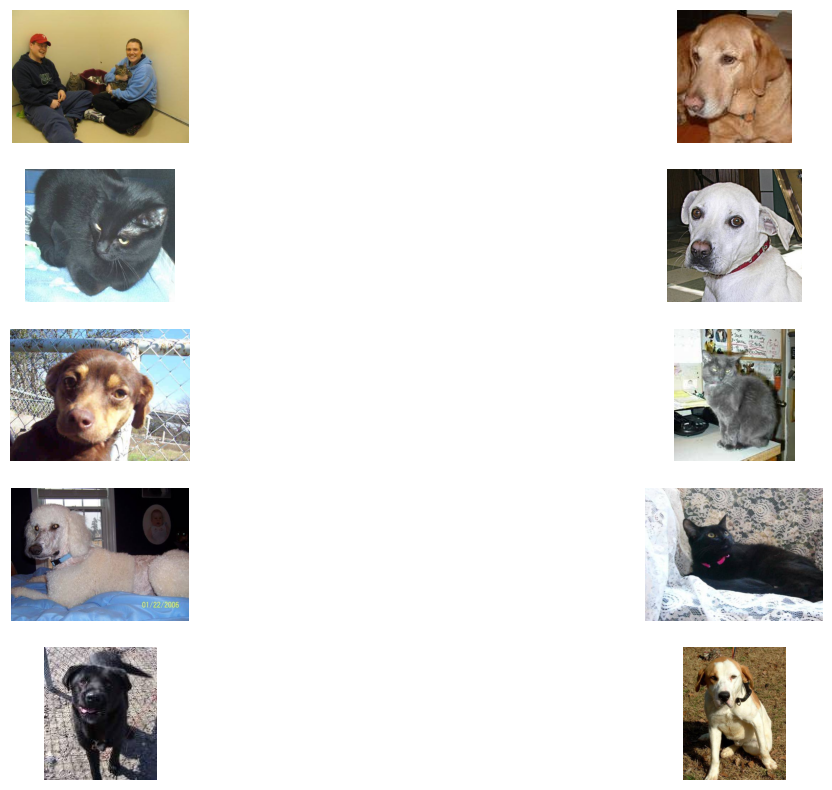

In [2]:
import os 
import zipfile
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten

#for unzipping the compressed folder
path='/kaggle/input/dogs-vs-cats'
for folder in os.listdir(path)[:2]:  #train.zip and test.zip
    zipfile.ZipFile(f"{path}/{folder}",).extractall(".")
    print(f"{path}/{folder}")

#to get the train data
train_images = os.listdir("/kaggle/working/train")
train_images[:10]  #string data

#to get the label from the input data 
labels=[]
for img in train_images:
    label = img.split('.')[0]
    label = (0 if label=='dog' else 1)
    labels.append(label)  


labels[:10]    
# creating data frame for images (which string) and labels(0,1)
df = pd.DataFrame({'image':train_images,'class':labels})
df.head()
df['class'].value_counts()

#for show 10 random samples from the data
plt.figure(figsize=(15,10))
random_samples = random.sample(df['image'].tolist(),10)  #convert to list to be accepted
for i,img in enumerate(random_samples):
    path = os.path.join("/kaggle/working/train",img)
    img = plt.imread(path)             #read the the value of each pixel in the image
    plt.subplot(5, 2, i + 1) 
    plt.imshow(img)
    plt.axis('off')  

#for convert all images in the training data
image_size = (64,64)
x = np.zeros((len(df), image_size[0], image_size[1], 3),dtype='uint8')
y = np.array(labels)

for i,img in enumerate(df['image']):
    path = os.path.join("/kaggle/working/train",img)
    img = cv2.imread(path)
    img = cv2.resize(img, image_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x[i] = np.array(img)


# Reshape x to 2D
#x = x.reshape(len(df), -1)  # Flatten each image

#split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)
 
#build the model using SVC
'''model = SVC(kernel='linear',C=1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)'''



#build the model using CNN with tensorflow
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

In [3]:
test_images = os.listdir("/kaggle/working/test1")
df_test=pd.DataFrame({'imges':test_images})

#for convert all images in the training data
image_size = (64,64)
x = np.zeros((len(df_test), image_size[0], image_size[1], 3),dtype='uint8')

for i,img in enumerate(df_test['imges']):
    path = os.path.join("/kaggle/working/test1",img)
    img = cv2.imread(path)
    img = cv2.resize(img, image_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x[i] = np.array(img)
model.predict(x)

391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step


array([[0.07803373],
       [0.00164604],
       [0.40968734],
       ...,
       [0.32359618],
       [0.9735237 ],
       [0.99938536]], dtype=float32)

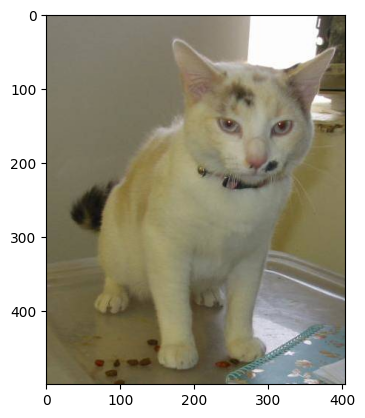

In [4]:
path = os.path.join("/kaggle/working/test1",df_test['imges'][8])
img = plt.imread(path)             #read the the value of each pixel in the image 
plt.imshow(img)  

In [5]:
predictions = model.predict(x)

# Convert predictions to binary labels (0 for dog, 1 for cat)
predicted_classes = (predictions > 0.5).astype("int32")

# Map predicted classes to labels
predicted_labels = ['cat' if pred == 1 else 'dog' for pred in predicted_classes.flatten()]

# Print results
for img_name, label in zip(test_images, predicted_labels):
    print(f'{img_name}: {label}')

391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step
5972.jpg: dog
11731.jpg: dog
6075.jpg: dog
10563.jpg: dog
4746.jpg: dog
5237.jpg: dog
8916.jpg: dog
7285.jpg: dog
10154.jpg: dog
12175.jpg: dog
9443.jpg: dog
1399.jpg: dog
845.jpg: dog
5251.jpg: dog
11104.jpg: dog
11524.jpg: cat
3559.jpg: dog
2323.jpg: cat
9927.jpg: cat
7106.jpg: cat
1778.jpg: cat
9398.jpg: dog
1461.jpg: cat
2277.jpg: cat
9937.jpg: dog
8384.jpg: dog
8881.jpg: dog
6653.jpg: dog
4757.jpg: cat
8537.jpg: dog
8435.jpg: cat
11552.jpg: dog
413.jpg: dog
3333.jpg: dog
458.jpg: cat
10998.jpg: dog
4263.jpg: cat
6820.jpg: dog
7667.jpg: dog
5343.jpg: dog
11792.jpg: dog
5150.jpg: dog
3558.jpg: dog
8282.jpg: dog
8065.jpg: cat
3249.jpg: dog
3005.jpg: dog
4025.jpg: dog
12094.jpg: cat
4764.jpg: dog
1396.jpg: cat
7474.jpg: cat
11091.jpg: cat
5351.jpg: dog
5084.jpg: cat
216.jpg: cat
12422.jpg: dog
11982.jpg: dog
2710.jpg: dog
8193.jpg: dog
5062.jpg: dog
11054.jpg: dog
9734.jpg: dog
12171.jpg: dog
11460.jpg: cat
11963.jpg: cat
11057.jpg: dog
3560.